<a href="https://colab.research.google.com/github/PTD504/CS114.O21/blob/main/LAB01/LAB01_DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÔ TẢ BÀI TOÁN

- Input: Chữ số viết tay
- Output: Kết quả nhận dạng

Tham khảo: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

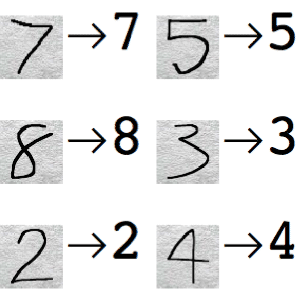

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# MNIST Handwritten Digit Classification Dataset

- Các ảnh greyscale có kích thước 28x28

11490434/11490434 [==============================] - 2s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


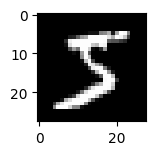

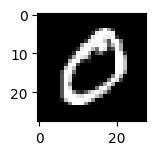

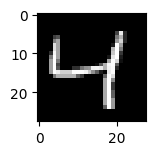

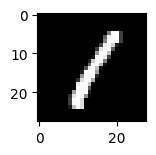

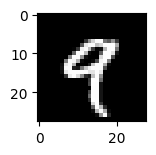

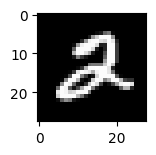

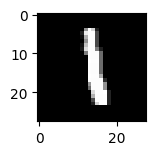

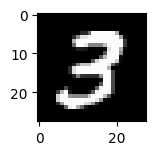

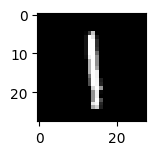

In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
  # show the figure
  plt.show()

In [2]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

## Load Dataset

* Tải bộ dữ liệu MNIST từ thư viện Keras
* Định hình lại dữ liệu hình ảnh để mỗi hình ảnh có kích thước là 28x28 pixel và chỉ có một kênh màu.
* Chuyển đổi nhãn từ dạng số nguyên sang dạng one-hot encoding

In [3]:
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = mnist.load_data()

  # reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

## Prepare Pixel Data

- Dữ liệu hình ảnh từ train và test được chuyển từ kiểu dữ liệu số nguyên sang kiểu dữ liệu số thực

- Dữ liệu hình ảnh được chuẩn hóa sao cho giá trị các pixel nằm trong khoảng từ 0 đến 1 bằng cách chia cho 255.0 (giá trị tối đa của một pixel trong ảnh RGB hoặc ảnh xám).


In [4]:
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0

  # return normalized images
  return train_norm, test_norm

## Define Model



In [5]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

Hàm define_model xây dựng một mạng nơ-ron tích chập (CNN) đơn giản nhưng hiệu quả cho bài toán nhận diện chữ số từ bộ dữ liệu MNIST. Nó bao gồm các lớp Convolutional để học các đặc trưng của hình ảnh, lớp MaxPooling để giảm kích thước không gian, các lớp Dense để kết nối đầy đủ giữa các nơ-ron, và lớp Softmax cuối cùng để đưa ra dự đoán xác suất cho từng lớp


## Evaluate Model

In [6]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()

  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)

  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):

    # define model
    model = define_model()

    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]

    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

    # stores scores
    scores.append(acc)
    histories.append(history)

  return scores, histories

Hàm evaluate_model thực hiện quá trình đánh giá mô hình sử dụng kỹ thuật K-fold cross-validation. Nó xây dựng, huấn luyện và đánh giá một mô hình học sâu cho mỗi fold, sau đó lưu trữ và trả về các điểm chính xác của mô hình từ mỗi fold và các lịch sử huấn luyện tương ứng. Điều này giúp cải thiện khả năng tổng quát hóa và đánh giá chính xác hiệu suất của mô hình trước khi áp dụng vào dữ liệu mới.

## Present Results



*  Mục đích của hàm run_test_harness:
Hàm này thường được sử dụng trong các dự án học máy và học sâu để tổ chức và tổng hợp các công việc chính như load dữ liệu, chuẩn bị dữ liệu, huấn luyện mô hình, đánh giá hiệu suất và trực quan hóa kết quả.
*  Kết quả của hàm summarize_performance(scores) in ra trung bình và độ lệch chuẩn của các điểm số chính xác, cùng với biểu đồ boxplot để biểu diễn phân phối của các điểm số này.
*  Hàm summarize_diagnostics(histories) in ra các biểu đồ cho loss và accuracy trên cả tập huấn luyện và tập kiểm tra của từng epoch trong quá trình huấn luyện.



In [7]:
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    # plot loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')

    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [8]:
def summarize_performance(scores):
  # print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))

  # box and whisker plots of results
  plt.boxplot(scores)
  plt.show()

In [9]:
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()

  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)

  # evaluate model
  scores, histories = evaluate_model(trainX, trainY)

  # learning curves
  summarize_diagnostics(histories)

  # summarize estimated performance
  summarize_performance(scores)

> 98.517
> 98.650
> 98.650
> 98.817
> 98.608


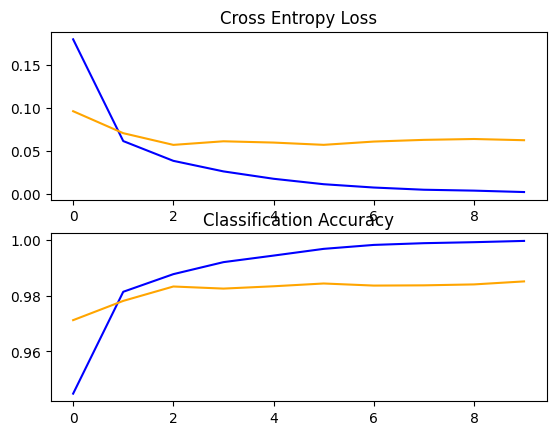

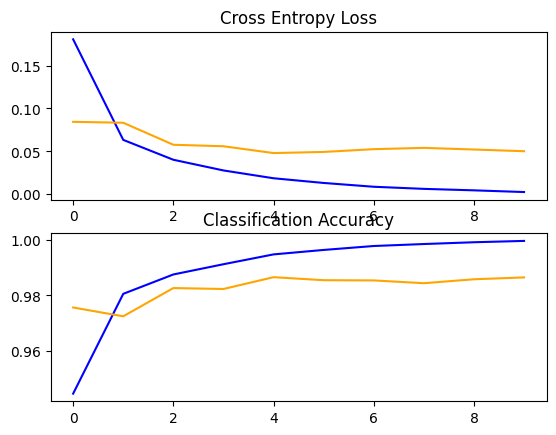

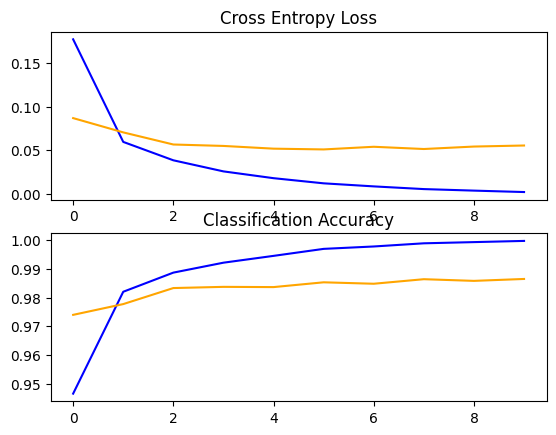

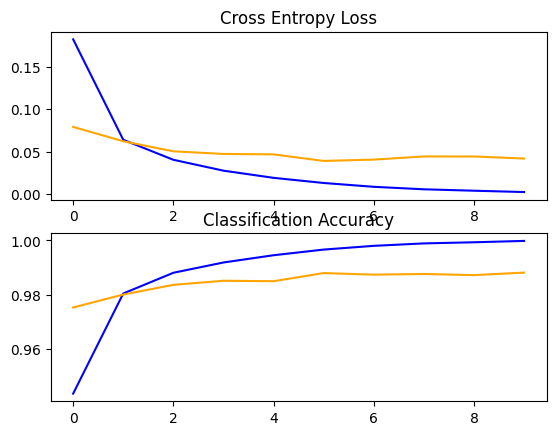

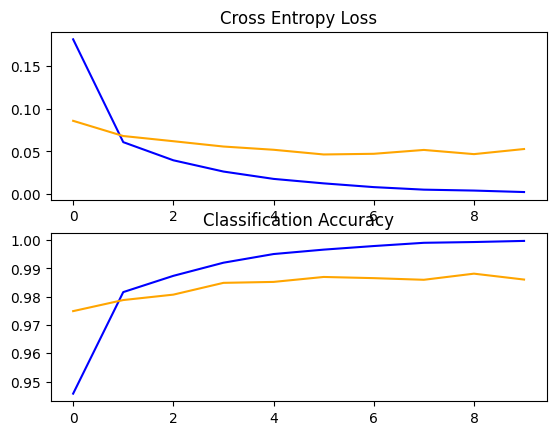

Accuracy: mean=98.648 std=0.097, n=5


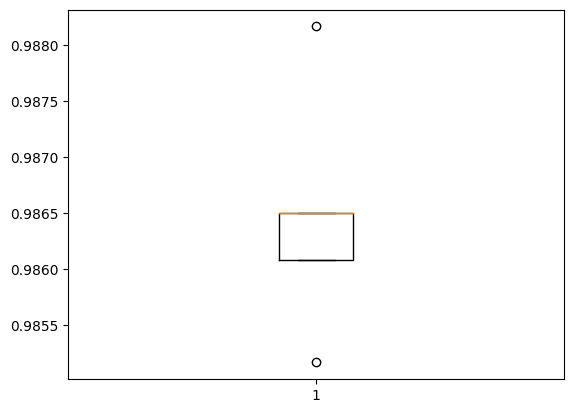

In [10]:
# entry point, run the test harness
run_test_harness()

## Save Final Model

* Huấn luyện một mô hình học sâu trên toàn bộ tập dữ liệu huấn luyện và lưu mô hình đã huấn luyện vào một tệp tin (file) có tên là final_model.h5.


In [11]:
# run the test harness for evaluating a model
def run_test_harness2():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()

  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # define model
  model = define_model()

  # fit model
  model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)

  # save model
  model.save('final_model.h5')

## Evaluate Final Model

In [12]:
run_test_harness2()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Make Prediction

* Chuẩn hóa ảnh đúng định dạng để đưa vào huấn luyện

In [13]:
def load_image(filename):
  # load the image
  img = load_img(filename, color_mode="grayscale", target_size=(28, 28))

  # convert to array
  img = img_to_array(img)

  img = 255 - img

  # reshape into a single sample with 1 channel
  img = img.reshape(1, 28, 28, 1)

  # prepare pixel data
  img = img.astype('float32')
  img = img / 255.0

  return img



*   Chuyển ảnh thành màu xám và lưu vào thư mục


In [16]:
import os, glob
from PIL import Image

#def print_dir():
#  for i in range(0, 10):
#    files = glob.glob(f'drive/MyDrive/data/{i}*')
#
#    for f in files:
#      print(f)

def convert_to_grayscale(file_dir):
  files = file_dir.split('/')
  img = Image.open(file_dir).convert('L')
  img.save(f'drive/MyDrive/grayscale/{files[-1]}')

In [ ]:
# load an image and predict the class
link_folder = 'drive/MyDrive/data'
model = load_model('drive/MyDrive/data/final_model.h5')
wrong = []
correct = []

def convert_all_to_grayscale():
  for i in range(0, 10):
    files = glob.glob(f'{link_folder}/{i}*')

    for f in files:
      convert_to_grayscale(f)

def predict():
  for i in range(10):
    files = glob.glob(f'drive/MyDrive/grayscale/{i}*')

    for f in files:
      img = load_image(f)
      predict_value = model.predict(img)
      digit = argmax(predict_value)

      if digit == i:
        correct.append(digit)
      else:
        wrong.append(digit)

  print(f'Correct: {len(correct)}')
  print(f'Wrong: {len(wrong)}')


* Kết quả dự đoán được so sánh với nhãn thực tế của từng lớp. Nếu dự đoán đúng (giá trị digit bằng i), nó được ghi nhận vào danh sách correct; nếu dự đoán sai, nó được ghi nhận vào danh sách wrong.

* Cuối cùng, sau khi dự đoán xong, nó in ra số lượng các ảnh được dự đoán đúng và sai cho mỗi lớp.

In [ ]:
# entry point, run the example
#convert_all_to_grayscale()
predict()

1/1 [==============================] - 0s 17ms/step
Correct: 13
Wrong: 39


* Hàm predict() giúp bạn đánh giá hiệu suất của mô hình đã huấn luyện trên tập dữ liệu ảnh xám từ 0 đến 9. Nó tính toán số lượng các ảnh được dự đoán đúng và sai cho mỗi lớp, từ đó cung cấp một cái nhìn tổng quan về hiệu suất của mô hình.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Xuất ra hình ảnh


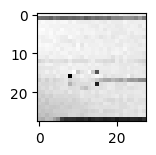

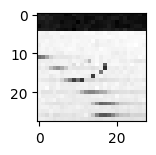

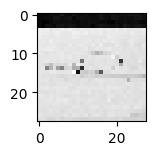

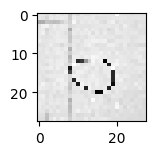

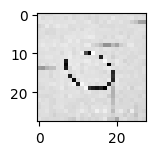

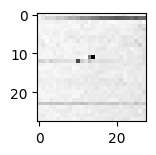

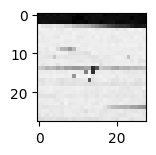

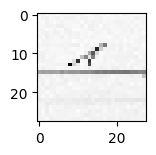

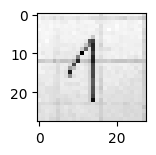

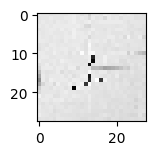

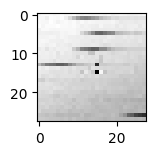

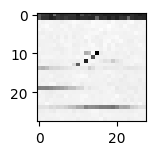

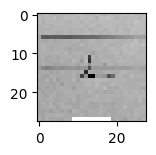

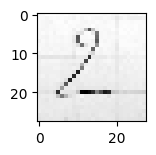

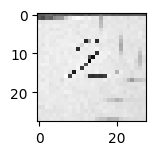

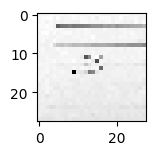

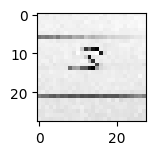

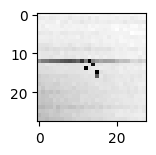

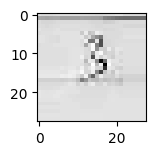

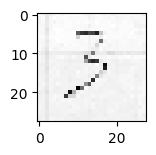

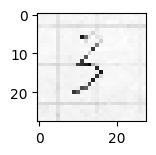

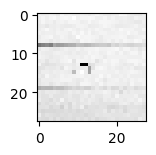

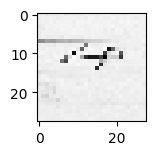

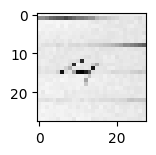

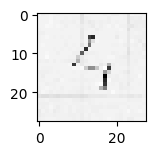

In [ ]:
#img = load_image('/content/drive/MyDrive/data/four.png')
#img = load_image('four.png')
#plt.subplot(331)
# plot raw pixel data
#plt.imshow(img.reshape(28, 28), cmap=plt.get_cmap('gray'))
# show the figure
#plt.show()

for i in range(5):
  images = glob.glob(f'drive/MyDrive/grayscale/{i}*')

  for image in images:
    img = load_image(image)
    plt.subplot(331)
    plt.imshow(img.reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()

* Sao chép tệp final_model.h5 từ vị trí hiện tại của nó đến /content/drive/MyDrive/data/final_model.h5

In [ ]:
import shutil

destination_file = '/content/drive/MyDrive/data/final_model.h5'
source_file = 'final_model.h5'

shutil.copyfile(source_file, destination_file)

'/content/drive/MyDrive/data/final_model.h5'

* Cuối cùng chúng ta lưu đưa output về dạng file csv sau khi đã dự đoán

In [ ]:
import os
import csv
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

# Load model từ file .h5
model = load_model('final_model.h5')

# Thư mục chứa các ảnh cần dự đoán
folder_path = 'drive/MyDrive/data'

# Tạo danh sách các tên file trong thư mục
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png') or f.endswith('.jpg') or f.endswith('.jepg')]

# Mở file CSV để ghi kết quả
with open('predictions.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Tên ảnh', 'Chữ số dự đoán'])  # Ghi tiêu đề cột

    # Dự đoán cho từng ảnh và ghi kết quả vào file CSV
    for image_file in image_files:
        # Load ảnh
        img = load_image(os.path.join(folder_path, image_file))

        # Dự đoán chữ số
        prediction = model.predict(img)
        predicted_digit = prediction.argmax()  # Chữ số có xác suất cao nhất

        # Ghi kết quả vào file CSV
        writer.writerow([image_file, predicted_digit])

print('Dự đoán hoàn tất. Kết quả đã được lưu vào file predictions.csv')
